In [1]:
!pip3 install pickle5

In [ ]:
import numpy as np
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import networkx as nx
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [ ]:
import pickle5 as pickle
with open("./listings.pkl", "rb") as fh:
  data = pickle.load(fh)

# Understanding the data

In [ ]:
data.columns

Index(['Are Pets Allowed', 'Category Idx', 'Day of Advertisement Created',
       'Day of Date Available From', 'Demand', 'Floor', 'Geo Canton',
       'Geo City', 'Geo Zip', 'Has Balcony', 'Has Cabletv', 'Has Elevator',
       'Has Fireplace', 'Has Garage', 'Has Parking', 'Is New Construction',
       'Is New Construction Potential', 'Is Tenant2Tenant',
       'Is Wheelchairaccessible', 'Listing Description', 'Listing Title',
       'Livingspace', 'Number Of Rooms', 'Number Of Rooms Cleaned',
       'Number of Documents', 'Number of Images', 'Price Extra Normalized',
       'Price Gross Normalized', 'Price M2 Normalized', 'Price Net Normalized',
       'Property Reference Id', 'Size M2 Normalized', 'Subcategory En Idx',
       'Year Built', 'Year Lastrenovated'],
      dtype='object')

In [ ]:
data.sample(5)

,Are Pets Allowed,Category Idx,Day of Advertisement Created,Day of Date Available From,Demand,Floor,Geo Canton,Geo City,Geo Zip,Has Balcony,...,Number of Images,Price Extra Normalized,Price Gross Normalized,Price M2 Normalized,Price Net Normalized,Property Reference Id,Size M2 Normalized,Subcategory En Idx,Year Built,Year Lastrenovated
5306,NaN,APPT,"January 8, 2021","March 1, 2021",1.0,0.0,AG,Rombach,5022,NaN,...,5,200.0,1125.0,19.0,925.0,2683.61.5829,60.0,Apartment,1964.0,1964.0
17984,NaN,APPT,"December 22, 2020","March 1, 2021",8.0,0.0,ZH,Richterswil,8805,NaN,...,6,280.0,1630.0,21.0,1350.0,5541.50.5829,76.0,Apartment,1973.0,2003.0
1284,NaN,APPT,"April 11, 2019","July 1, 2019",15.0,2.0,ZH,Oberengstringen,8102,NaN,...,6,329.0,1879.0,23.0,1550.0,0824.61.9662,82.0,Roof flat,NaN,NaN
9414,True,APPT,"February 5, 2021","May 1, 2021",10.0,1.0,AG,Untersiggenthal,5417,NaN,...,13,200.0,1590.0,19.0,1390.0,2938.56.8394,83.0,Apartment,2011.0,2011.0
12484,False,APPT,"March 14, 2017","December 1, 2016",1.0,0.0,SO,Zuchwil,4528,False,...,5,250.0,1100.0,20.0,850.0,7340.06.5829,55.0,Apartment,NaN,NaN


In [ ]:
features = data[['Are Pets Allowed', 'Category Idx', 'Day of Advertisement Created',
       'Day of Date Available From', 'Floor', 'Geo Canton',
       'Geo City', 'Geo Zip', 'Has Balcony', 'Has Cabletv', 'Has Elevator',
       'Has Fireplace', 'Has Garage', 'Has Parking', 'Is New Construction',
       'Is New Construction Potential', 'Is Tenant2Tenant',
       'Is Wheelchairaccessible', 'Listing Description', 'Listing Title',
       'Livingspace', 'Number Of Rooms', 'Number Of Rooms Cleaned',
       'Number of Documents', 'Number of Images', 'Price Extra Normalized',
       'Price Gross Normalized', 'Price M2 Normalized', 'Price Net Normalized',
       'Property Reference Id', 'Size M2 Normalized', 'Subcategory En Idx',
       'Year Built', 'Year Lastrenovated']]

label = data['Demand']

label.describe()

count    20000.000000
mean         8.648900
std         18.275794
min          0.000000
25%          1.000000
50%          3.000000
75%          9.000000
max        672.000000
Name: Demand, dtype: float64

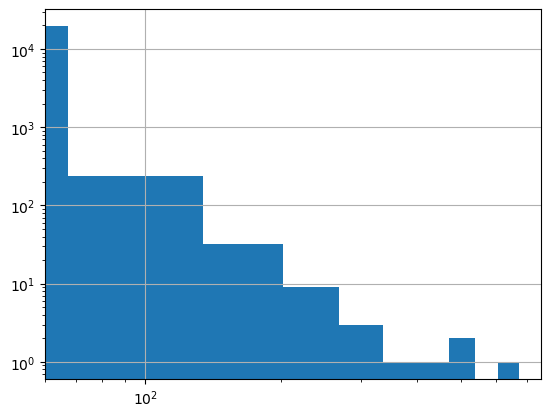

In [ ]:
# ax = sns.histplot(label, kde=True, stat='density', color='blue', label='prop of likes')
# plt.legend()
# plt.show()
label.hist()
plt.xscale('log')
plt.yscale('log')

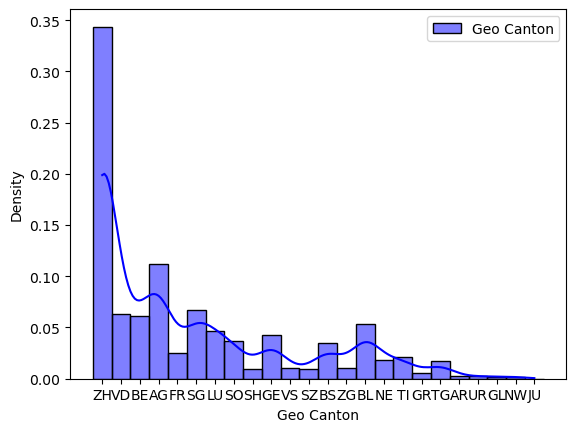

In [ ]:
ax = sns.histplot(features['Geo Canton'], kde=True, stat='density', color='blue', label='Geo Canton')

plt.legend()
plt.show()

In [ ]:
data['Year Lastrenovated'].value_counts()

2012.0    364
2013.0    361
2014.0    340
2011.0    322
2015.0    280
         ... 
1874.0      1
1390.0      1
1915.0      1
1586.0      1
1800.0      1
Name: Year Lastrenovated, Length: 136, dtype: int64

<AxesSubplot:>

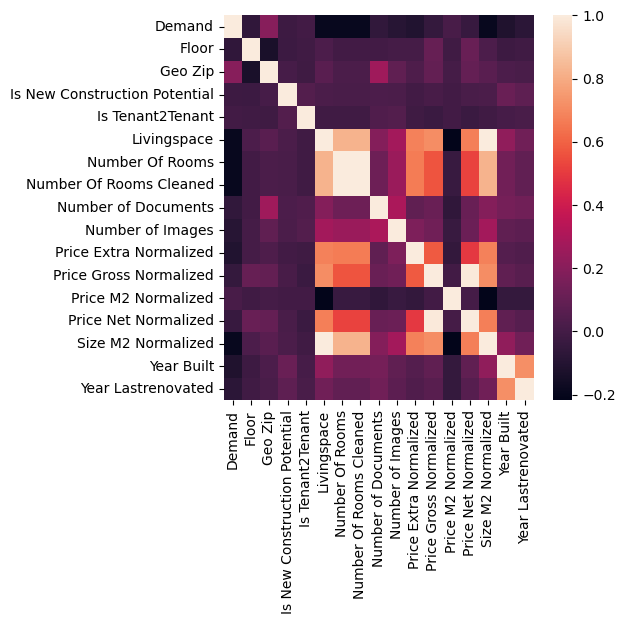

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr())

# Data cleaning

In [ ]:
#Data cleaning
## Replace binary columns by 0|1
binary_features = ['Are Pets Allowed', 'Has Balcony', 'Has Cabletv', 'Has Elevator',
                  'Has Fireplace', 'Has Garage', 'Has Parking', 'Is New Construction',
                  'Is New Construction Potential', 'Is Tenant2Tenant',
                  'Is Wheelchairaccessible']
for column in binary_features:
  data.loc[data[column] == False, column] = 0
  data.loc[data[column] == True, column] = 1


# Replace cities, cantons, subcategory etc... by number labels
# BE CAREFUL, only generate once this cell !!!

data = pd.get_dummies(data, prefix=['Geo'], columns=['Geo Canton'])

# data['Geo Canton'] = data['Geo Canton'].map({
#                              'ZH': 1,
#                              'AG': 2,
#                              'SG': 3,
#                              'VD':4,
#                              'BE': 5,
#                              'BL': 6,
#                              'LU': 7,
#                              'GE':8,
#                              'SO': 9,
#                              'BS': 10,
#                              'FR': 11,
#                              'TI':12,
#                              'NE': 13,
#                              'TG': 14,
#                              'VS': 15,
#                              'ZG':16,
#                              'SH': 17,
#                              'SZ': 18,
#                              'GR': 19,
#                              'UR': 20,
#                              'AR': 21,
#                              'NW': 22,
#                              'GL': 23,
#                              'JU': 24})
#                             #  na_action=None)
    
 
     
   
     
     
     
 

data.sample(10)

,Are Pets Allowed,Category Idx,Day of Advertisement Created,Day of Date Available From,Demand,Floor,Geo City,Geo Zip,Has Balcony,Has Cabletv,...,Geo_SH,Geo_SO,Geo_SZ,Geo_TG,Geo_TI,Geo_UR,Geo_VD,Geo_VS,Geo_ZG,Geo_ZH
1397,NaN,APPT,"January 13, 2020","April 1, 2020",16.0,2.0,Zürich,8052,NaN,1,...,0,0,0,0,0,0,0,0,0,1
5870,NaN,APPT,"September 12, 2019","November 1, 2019",35.0,7.0,Zürich,8051,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
63,1,APPT,"June 4, 2019",NaN,5.0,0.0,Würenlingen,5303,NaN,1,...,0,0,0,0,0,0,0,0,0,0
18431,NaN,APPT,"October 27, 2021","January 1, 2022",18.0,1.0,Au ZH,8804,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1
16274,0,APPT,"January 20, 2018","January 1, 2017",25.0,1.0,Genève,1202,0,1,...,0,0,0,0,0,0,0,0,0,0
18488,NaN,APPT,"December 9, 2020","February 1, 2021",8.0,0.0,Pfäffikon SZ,8808,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
13691,0,APPT,"November 14, 2017","February 1, 2018",4.0,1.0,Zürich,8057,0,1,...,0,0,0,0,0,0,0,0,0,1
17736,0,APPT,"August 2, 2018","October 1, 2018",6.0,4.0,Dietikon,8953,0,0,...,0,0,0,0,0,0,0,0,0,1
1195,0,APPT,"April 18, 2018",NaN,0.0,1.0,Oberentfelden,5036,0,1,...,0,0,0,0,0,0,0,0,0,0
3738,0,APPT,"July 31, 2018","November 1, 2018",2.0,1.0,Nidau,2560,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
output_cols = list(data['Demand'])

input_cols = data[['Are Pets Allowed', 'Floor',
       'Has Balcony', 'Has Cabletv', 'Has Elevator',
       'Has Fireplace', 'Has Garage', 'Has Parking', 'Is New Construction',
       'Is New Construction Potential', 'Is Tenant2Tenant',
       'Is Wheelchairaccessible', 'Livingspace', 'Number Of Rooms', 'Number Of Rooms Cleaned',
       'Number of Documents', 'Number of Images', 'Price Extra Normalized',
       'Price Gross Normalized', 'Price M2 Normalized', 'Price Net Normalized', 'Size M2 Normalized',
       'Geo_AG', 'Geo_AR', 'Geo_BE',
       'Geo_BL', 'Geo_BS', 'Geo_FR', 'Geo_GE', 'Geo_GL', 'Geo_GR', 'Geo_JU',
       'Geo_LU', 'Geo_NE', 'Geo_NW', 'Geo_SG', 'Geo_SH', 'Geo_SO', 'Geo_SZ',
       'Geo_TG', 'Geo_TI', 'Geo_UR', 'Geo_VD', 'Geo_VS', 'Geo_ZG', 'Geo_ZH']]

# Normalization of feature columns

def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

input_cols_norm = mean_norm(input_cols)
input_cols_norm.fillna(input_cols_norm.median(), inplace=True)
input_cols_norm.sample(10)

,Are Pets Allowed,Floor,Has Balcony,Has Cabletv,Has Elevator,Has Fireplace,Has Garage,Has Parking,Is New Construction,Is New Construction Potential,...,Geo_SH,Geo_SO,Geo_SZ,Geo_TG,Geo_TI,Geo_UR,Geo_VD,Geo_VS,Geo_ZG,Geo_ZH
14799,-0.832208,0.326060,-0.200172,-1.317803,0.798902,-0.156072,-1.111143,-0.916588,-0.079381,-0.125677,...,-0.099737,-0.196833,-0.097148,-0.132288,-0.147698,-0.051055,-0.259622,-0.104974,-0.10473,1.382123
16480,-0.832208,1.255078,-0.200172,0.758779,0.798902,-0.156072,0.899897,-0.916588,-0.079381,-0.125677,...,-0.099737,-0.196833,-0.097148,-0.132288,-0.147698,-0.051055,-0.259622,-0.104974,-0.10473,-0.723488
3956,1.201510,-1.067466,-0.200172,0.758779,-1.251618,-0.156072,0.899897,1.090902,-0.079381,-0.125677,...,-0.099737,-0.196833,-0.097148,-0.132288,-0.147698,-0.051055,-0.259622,-0.104974,-0.10473,-0.723488
12515,1.201510,1.719586,-0.200172,0.758779,0.798902,-0.156072,0.899897,-0.916588,-0.079381,-0.125677,...,-0.099737,-0.196833,-0.097148,-0.132288,6.770237,-0.051055,-0.259622,-0.104974,-0.10473,-0.723488
18877,-0.832208,0.326060,-0.200172,0.758779,0.798902,-0.156072,0.899897,-0.916588,-0.079381,-0.125677,...,-0.099737,-0.196833,-0.097148,-0.132288,-0.147698,-0.051055,-0.259622,-0.104974,-0.10473,-0.723488
13812,-0.832208,0.790569,-0.200172,-1.317803,-1.251618,-0.156072,-1.111143,-0.916588,-0.079381,-0.125677,...,-0.099737,-0.196833,-0.097148,-0.132288,-0.147698,-0.051055,3.851567,-0.104974,-0.10473,-0.723488
15683,-0.832208,2.184095,-0.200172,0.758779,0.798902,-0.156072,0.899897,-0.916588,-0.079381,-0.125677,...,-0.099737,-0.196833,-0.097148,-0.132288,-0.147698,-0.051055,-0.259622,-0.104974,-0.10473,1.382123
17052,1.201510,0.326060,-0.200172,0.758779,0.798902,-0.156072,0.899897,1.090902,12.596064,7.956476,...,-0.099737,-0.196833,-0.097148,-0.132288,-0.147698,-0.051055,-0.259622,-0.104974,-0.10473,-0.723488
6280,-0.832208,-0.138449,-0.200172,0.758779,0.798902,-0.156072,0.899897,-0.916588,-0.079381,-0.125677,...,-0.099737,-0.196833,-0.097148,-0.132288,-0.147698,-0.051055,-0.259622,-0.104974,-0.10473,1.382123
13865,1.201510,-0.138449,-0.200172,0.758779,0.798902,-0.156072,0.899897,-0.916588,-0.079381,-0.125677,...,-0.099737,-0.196833,-0.097148,-0.132288,-0.147698,-0.051055,-0.259622,-0.104974,-0.10473,1.382123


# I. Regression using SkLearn

## a) Logistic regression

In [ ]:
#Regression using sklearn
from sklearn import linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

L = [10, 100, 1000]

for c in L:
  X = input_cols_norm.to_numpy()
  model = lm.LogisticRegression(C=c, max_iter=30)

  X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.33, random_state=42)

  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  print(c, "-->  accuracy = ", accuracy_score(y_test, y_pred))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


10 -->  accuracy =  0.2203030303030303


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


100 -->  accuracy =  0.2206060606060606
1000 -->  accuracy =  0.2206060606060606


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## b) SVM

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
X = input_cols_norm.to_numpy()
model_SVR = svm.SVR(C=10)
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.33, random_state=42)
model_SVR.fit(X_train,y_train)
Y_pred = model_SVR.predict(X_test)
Y_pred = np.round(Y_pred)

print(Y_pred)
print(y_test.to_numpy())

corrects = 0
for i in range(len(Y_pred)):
    if Y_pred[i] == y_test.to_numpy()[i]:
        corrects += 1

accuracy = corrects / len(Y_pred)
print(accuracy)


# print(mean_absolute_percentage_error(y_test, Y_pred))

[ 0. 20.  4. ... 17.  0.  1.]
[ 1.  0.  9. ... 10.  0.  1.]
0.16090909090909092


## c) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = input_cols_norm.to_numpy()
model_RFR = RandomForestRegressor(n_estimators=1)
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.33, random_state=42)
model_RFR.fit(X_train, y_train)
Y_pred = model_RFR.predict(X_test)
Y_pred = np.round(Y_pred)

print(Y_pred)
print(y_test.to_numpy())

corrects = 0
for i in range(len(Y_pred)):
    if Y_pred[i] == y_test.to_numpy()[i]:
        corrects += 1

accuracy = corrects / len(Y_pred)
print(accuracy)



[ 0.  1.  1. ... 19.  0.  1.]
[ 1.  0.  9. ... 10.  0.  1.]
0.14833333333333334


# II. Regression using PyTorch

## Linear regression

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
from torch.autograd import Variable
import torchvision.models as models


In [ ]:
inputs_array, targets_array1 = np.array(input_cols_norm.to_numpy()), label.to_numpy()
targets_array=[]
#We add brakets for tensor structure... (can be done differently)
for elt in targets_array1:
    targets_array.append([elt])
targets_array = np.array(targets_array)

print(type(inputs_array))
print(type(targets_array))
print(inputs_array)
print(targets_array)

inputs = torch.from_numpy(inputs_array).to(torch.float32)
targets = torch.from_numpy(targets_array).to(torch.float32)
dataset = TensorDataset(inputs, targets)

print(dataset)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[[-0.83220833 -1.06746644 -0.20017178 ... -0.10497413 -0.10473044
   1.3821235 ]
 [-0.83220833 -0.60295764 -0.20017178 ... -0.10497413 -0.10473044
  -0.72348817]
 [-0.83220833 -0.60295764 -0.20017178 ... -0.10497413 -0.10473044
  -0.72348817]
 ...
 [-0.83220833  1.25507753 -0.20017178 ... -0.10497413 -0.10473044
  -0.72348817]
 [-0.83220833  2.18409511 -0.20017178 ... -0.10497413 -0.10473044
  -0.72348817]
 [-0.83220833 -1.06746644 -0.20017178 ... -0.10497413 -0.10473044
  -0.72348817]]
[[25.]
 [ 2.]
 [ 0.]
 ...
 [ 2.]
 [ 2.]
 [ 3.]]


### Train dataset and validation dataset


In [ ]:
VAL_PERCENT = 0.2
NUM_ROWS = int(len(data))
val_size = int(NUM_ROWS * VAL_PERCENT)
train_size = NUM_ROWS - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])

print(len(train_ds), len(val_ds))

16000 4000


In [ ]:
BATCH_SIZE = 128

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE)

for xb, yb, in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break



inputs: tensor([[-0.8322, -1.0675, -0.2002,  ..., -0.1050, -0.1047, -0.7235],
        [-0.8322, -1.0675, -0.2002,  ..., -0.1050, -0.1047,  1.3821],
        [-0.8322, -1.0675, -0.2002,  ..., -0.1050, -0.1047,  1.3821],
        ...,
        [ 1.2015, -0.6030, -0.2002,  ..., -0.1050, -0.1047,  1.3821],
        [ 1.2015, -0.1384, -0.2002,  ..., -0.1050, -0.1047,  1.3821],
        [ 1.2015,  0.3261, -0.2002,  ..., -0.1050, -0.1047, -0.7235]])
targets: tensor([[ 1.],
        [10.],
        [19.],
        [ 3.],
        [15.],
        [17.],
        [ 2.],
        [ 2.],
        [ 0.],
        [ 0.],
        [58.],
        [ 4.],
        [ 2.],
        [ 8.],
        [ 3.],
        [ 9.],
        [ 1.],
        [ 6.],
        [ 1.],
        [ 0.],
        [ 5.],
        [ 1.],
        [ 3.],
        [ 7.],
        [ 4.],
        [26.],
        [ 1.],
        [ 0.],
        [ 1.],
        [ 2.],
        [ 0.],
        [13.],
        [ 0.],
        [ 8.],
        [33.],
        [ 7.],
        [

In [ ]:
#Creation of linear regression model

in_cols = input_cols.columns
out_cols = ['Demand']

input_size = len(in_cols)
output_size = len(out_cols)

class PredictModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, xb):
        out = self.linear(xb)
        # out = torch.sigmoid(self.linear(xb))
        return out
    
    def training_step(self, batch):
        inputs, targets = batch
        out = self(inputs)
        loss = F.l1_loss(out, targets)
        return loss
    
    def validation_step(self, batch):
        inputs, targets = batch
        out = self(inputs)
        loss = F.l1_loss(out, targets)
        return {'val_loss': loss.detach()}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        return {'val_loss': epoch_loss.item()}
    
    def epoch_end(self, epoch, result, num_epochs):
        if (epoch+1) % 20 == 0 or epoch == num_epochs - 1:
            print("Epoch[{}], val_loss: {:.4f}".format(epoch+1, result['val_loss']))

In [ ]:
#Defining our model 
model = PredictModel()
list(model.parameters())

[Parameter containing:
 tensor([[-0.1103, -0.0337, -0.1334, -0.1065,  0.0223,  0.1320, -0.0861,  0.1279,
          -0.1314,  0.0991,  0.1017, -0.0753,  0.1263,  0.0072,  0.0938, -0.0739,
          -0.0089, -0.0766, -0.0996,  0.0246, -0.1387,  0.1335,  0.0700,  0.0830,
           0.1450, -0.0355, -0.0273, -0.0161,  0.0797,  0.0633,  0.0455, -0.1170,
           0.1109, -0.1312,  0.1167, -0.0601,  0.0560,  0.1297,  0.0758, -0.0075,
           0.0470, -0.0734,  0.0544, -0.0638, -0.0653, -0.1251]],
        requires_grad=True),
 Parameter containing:
 tensor([0.0684], requires_grad=True)]

In [ ]:
#Training loop

def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history=[]
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)
    return history

result = evaluate(model, val_loader)
print(result)

{'val_loss': 8.897245407104492}


In [ ]:
epochs = 300
lr = 0.00001
history = fit(epochs, lr, model, train_loader, val_loader)

Epoch[20], val_loss: 8.8672
Epoch[40], val_loss: 8.8378
Epoch[60], val_loss: 8.8091
Epoch[80], val_loss: 8.7812
Epoch[100], val_loss: 8.7540
Epoch[120], val_loss: 8.7276
Epoch[140], val_loss: 8.7019
Epoch[160], val_loss: 8.6769
Epoch[180], val_loss: 8.6524
Epoch[200], val_loss: 8.6286
Epoch[220], val_loss: 8.6054
Epoch[240], val_loss: 8.5829
Epoch[260], val_loss: 8.5609
Epoch[280], val_loss: 8.5394
Epoch[300], val_loss: 8.5185


In [ ]:
# We try to test our model on a random value of the test set

def predict_single(input, target, model):
    inputs = input.unsqueeze(0)
    predictions = model(inputs)         
    prediction = predictions[0].detach()
    return prediction

input, target = val_ds[50]
prediction = predict_single(input, target, model)

print("Input:", input)
print("Target:", target)
print("Prediction:", prediction)

Input: tensor([-0.8322,  0.3261, -0.2002,  0.7588,  0.7989, -0.1561,  0.8999, -0.9166,
        -0.0794, -0.1257, -0.1090, -0.0535,  0.3236, -0.2934, -0.2934,  0.6735,
         0.6013,  0.0991, -0.6624, -0.1515, -0.7182,  0.3235, -0.3558, -0.0490,
        -0.2556, -0.2370, -0.1906, -0.1600, -0.2108, -0.0436, -0.0723, -0.0122,
        -0.2217, -0.1367, -0.0464, -0.2688, -0.0997, -0.1968, -0.0971, -0.1323,
        -0.1477, -0.0511, -0.2596,  9.5257, -0.1047, -0.7235])
Target: tensor([1.])
Prediction: tensor([0.1257])


In [ ]:
# Return the entire predictions (Tensor Y_label)
def predict_all(val_ds, target, model):
    predictions = []
    for i in range(len(val_ds)):
       input, target = val_ds[i]
       prediction = predict_single(input, target, model)
       predictions.append(prediction.numpy()[0])
    return predictions

predictions = predict_all(val_ds, target, model)

#On arrondi à l'entier le plus proche pour effectuer notre prédciton
predictions = np.round(predictions)

print(predictions)


[ 1.  1.  0. ...  0.  1. -0.]


## Accuracy of linear model

In [ ]:
#Computation of the accurcy of our model on test set
EPSILON = 0

def accuracy(val_ds, model, EPSILON):
    corrects = 0
    for i in range(len(val_ds)):
        input, target = val_ds[i]
        prediction = predict_single(input, target, model)
        prediction = np.round(prediction)
        if prediction <= target + EPSILON and prediction >= target - EPSILON:
            corrects+=1
    accuracy = corrects/len(val_ds)
    print("Accuracy for EPSILON={}:".format(EPSILON), accuracy)
    return accuracy

accuracy(val_ds, model, EPSILON)




Accuracy for EPSILON=0: 0.192


0.192

### Test for several epsilons


Accuracy for EPSILON=0: 0.192
Accuracy for EPSILON=1: 0.40075
Accuracy for EPSILON=2: 0.49525
Accuracy for EPSILON=4: 0.62075
Accuracy for EPSILON=5: 0.65925
Accuracy for EPSILON=7: 0.7205
Accuracy for EPSILON=9: 0.767
Accuracy for EPSILON=10: 0.78975
Accuracy for EPSILON=20: 0.893
Accuracy for EPSILON=40: 0.9565
Accuracy for EPSILON=60: 0.98225


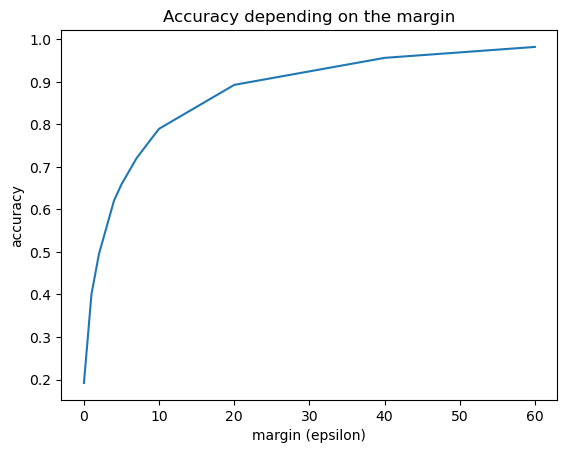

In [ ]:
# We test for several epsilons
EPSILONS = [0, 1, 2, 4, 5, 7, 9, 10, 20, 40 ,60]

def plot_accuracy(val_ds, model, EPSILONS):
    accuracies = []
    for eps in EPSILONS:
        acc = accuracy(val_ds, model, eps)
        accuracies.append(acc)
    
    plt.plot(EPSILONS, accuracies)
    plt.xlabel("margin (epsilon)")
    plt.ylabel("accuracy")
    plt.title("Accuracy depending on the margin")

plot_accuracy(val_ds, model, EPSILONS)


### We save the model

In [ ]:
# #We save the model
# model = models.vgg16(pretrained=True)
# torch.save(model.state_dict(), 'model_weights.pth')
# print("Saved PyTorch Model State to model_weights.pth")

In [ ]:
# #We load the model

# model = models.vgg16() # we do not specify pretrained=True, i.e. do not load default weights
# model.load_state_dict(torch.load('model_weights.pth'))
# model.eval()

